# Specifying Data in Altair

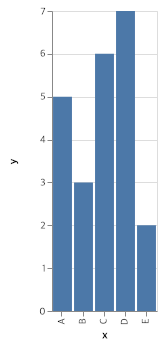

In [8]:
# can infer the types (DataFrame)

import altair as alt
import pandas as pd

data = pd.DataFrame({'x': ['A', 'B', 'C', 'D', 'E'],
                     'y': [5, 3, 6, 7, 2]})
alt.Chart(data).mark_bar().encode(
    x='x',
    y='y',
)

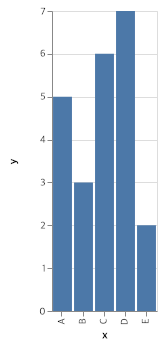

In [9]:
# cannot infer the types (JSON)

import altair as alt

data = alt.Data(values=[{'x': 'A', 'y': 5},
                        {'x': 'B', 'y': 3},
                        {'x': 'C', 'y': 6},
                        {'x': 'D', 'y': 7},
                        {'x': 'E', 'y': 2}])
alt.Chart(data).mark_bar().encode(
    x='x:O',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

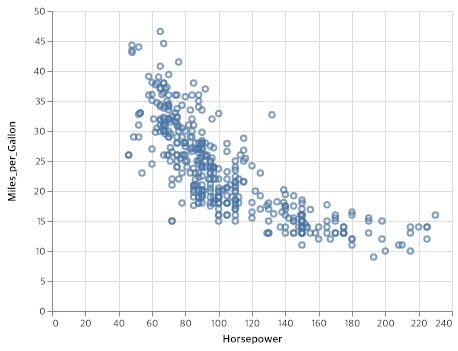

In [4]:
# cannot infer the types (url)

import altair as alt
from vega_datasets import data
url = data.cars.url

alt.Chart(url).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q'
)

In [11]:
import numpy as np
rand = np.random.RandomState(0)

data = pd.DataFrame({'value': rand.randn(100).cumsum()},
                    index=pd.date_range('2018', freq='D', periods=100))
data.head()

,value
2018-01-01,1.764052
2018-01-02,2.164210
2018-01-03,3.142948
2018-01-04,5.383841
2018-01-05,7.251399


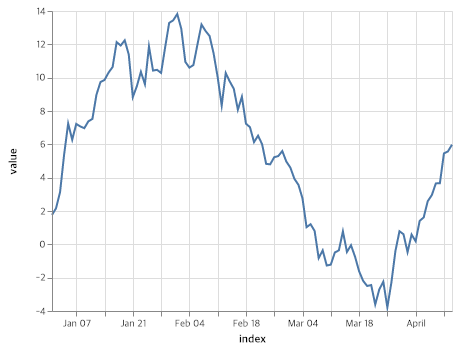

In [12]:
# only accesses dataframe columns

alt.Chart(data.reset_index()).mark_line().encode(
    x='index:T',
    y='value:Q'
)

In [14]:
wide_form = pd.DataFrame({'Date': ['2007-10-01', '2007-11-01', '2007-12-01'],
                          'AAPL': [189.95, 182.22, 198.08],
                          'AMZN': [89.15, 90.56, 92.64],
                          'GOOG': [707.00, 693.00, 691.48]})
print(wide_form)

     AAPL   AMZN        Date    GOOG
0  189.95  89.15  2007-10-01  707.00
1  182.22  90.56  2007-11-01  693.00
2  198.08  92.64  2007-12-01  691.48


In [15]:
# Altair works best with this long-form data

long_form = pd.DataFrame({'Date': ['2007-10-01', '2007-11-01', '2007-12-01',
                                   '2007-10-01', '2007-11-01', '2007-12-01',
                                   '2007-10-01', '2007-11-01', '2007-12-01'],
                          'company': ['AAPL', 'AAPL', 'AAPL',
                                      'AMZN', 'AMZN', 'AMZN',
                                      'GOOG', 'GOOG', 'GOOG'],
                          'price': [189.95, 182.22, 198.08,
                                     89.15,  90.56,  92.64,
                                    707.00, 693.00, 691.48]})
print(long_form)

         Date company   price
0  2007-10-01    AAPL  189.95
1  2007-11-01    AAPL  182.22
2  2007-12-01    AAPL  198.08
3  2007-10-01    AMZN   89.15
4  2007-11-01    AMZN   90.56
5  2007-12-01    AMZN   92.64
6  2007-10-01    GOOG  707.00
7  2007-11-01    GOOG  693.00
8  2007-12-01    GOOG  691.48


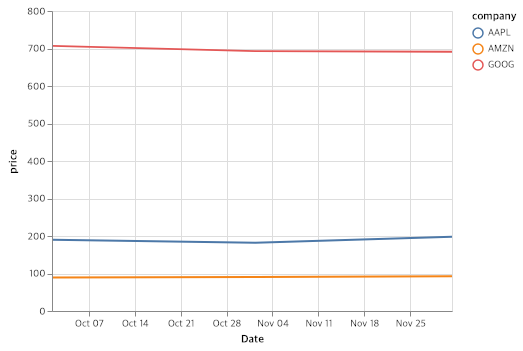

In [16]:
alt.Chart(long_form).mark_line().encode(
  x='Date:T',
  y='price:Q',
  color='company:N'
)

In [17]:
wide_form.melt('Date', var_name='company', value_name='price')

,Date,company,price
0,2007-10-01,AAPL,189.95
1,2007-11-01,AAPL,182.22
2,2007-12-01,AAPL,198.08
3,2007-10-01,AMZN,89.15
4,2007-11-01,AMZN,90.56
5,2007-12-01,AMZN,92.64
6,2007-10-01,GOOG,707.00
7,2007-11-01,GOOG,693.00
8,2007-12-01,GOOG,691.48


In [18]:
wide_form = long_form.pivot(index='Date', columns='company', values='price')
print(wide_form)

company       AAPL   AMZN    GOOG
Date                             
2007-10-01  189.95  89.15  707.00
2007-11-01  182.22  90.56  693.00
2007-12-01  198.08  92.64  691.48


# Encodings
- mapping of visual properties to data columns

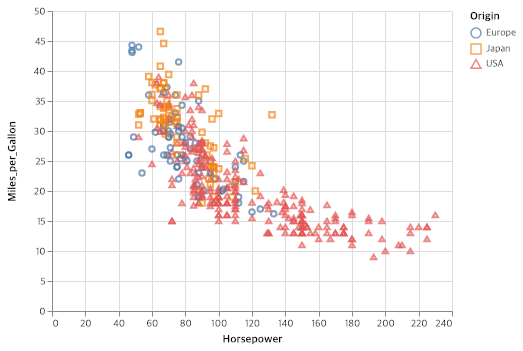

In [19]:
import altair as alt
from vega_datasets import data
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    shape='Origin'
)

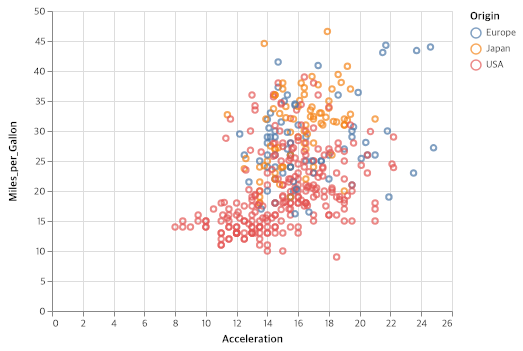

In [20]:
# shorthand syntax

alt.Chart(cars).mark_point().encode(
    x='Acceleration:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N'
)

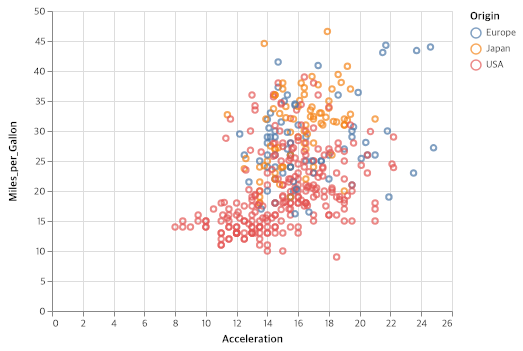

In [21]:
alt.Chart(cars).mark_point().encode(
    alt.X('Acceleration', type='quantitative'),
    alt.Y('Miles_per_Gallon', type='quantitative'),
    alt.Color('Origin', type='nominal')
)

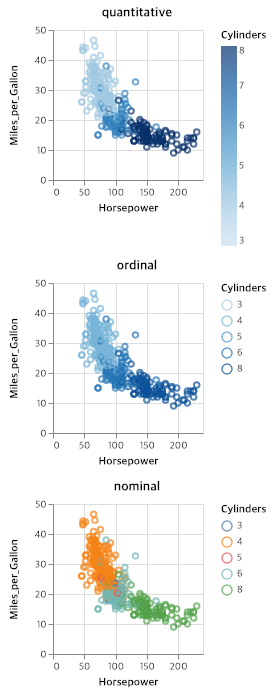

In [23]:
# Color

base = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
).properties(
    width=150,
    height=150
)

alt.vconcat(
   base.encode(color='Cylinders:Q').properties(title='quantitative'),
   base.encode(color='Cylinders:O').properties(title='ordinal'),
   base.encode(color='Cylinders:N').properties(title='nominal'),
)

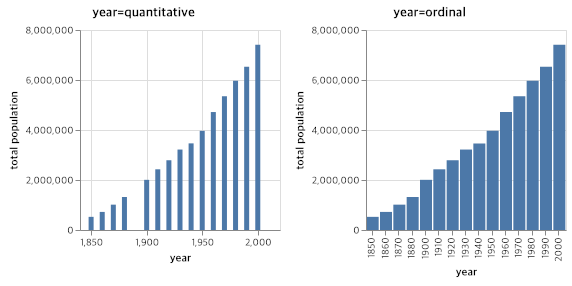

In [24]:
# Axis

pop = data.population.url

base = alt.Chart(pop).mark_bar().encode(
    alt.Y('mean(people):Q', axis=alt.Axis(title='total population'))
).properties(
    width=200,
    height=200
)

alt.hconcat(
    base.encode(x='year:Q').properties(title='year=quantitative'),
    base.encode(x='year:O').properties(title='year=ordinal')
)

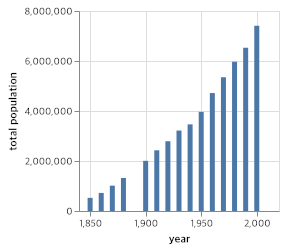

In [25]:
base.encode(
    alt.X('year:Q',
        scale=alt.Scale(zero=False)
    )
)

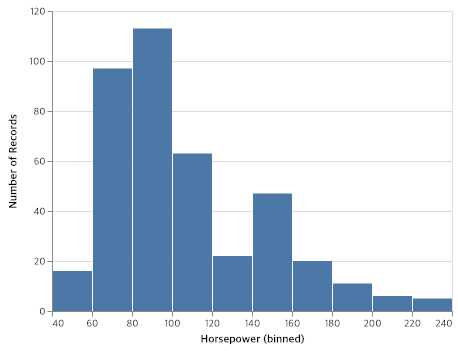

In [26]:
# database style grouping and aggregation (split-apply-combine)

alt.Chart(cars).mark_bar().encode(
    alt.X('Horsepower', bin=True),
    y='count()'
    # could also use alt.Y(aggregate='count', type='quantitative')
)

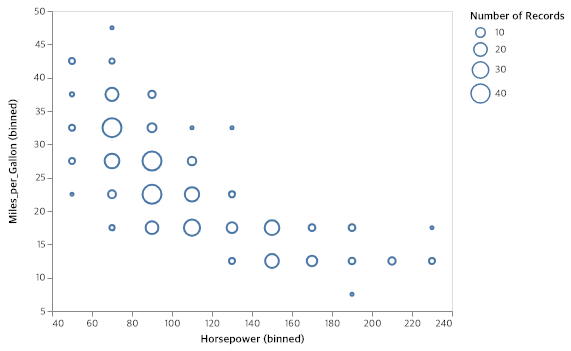

In [27]:
alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower', bin=True),
    alt.Y('Miles_per_Gallon', bin=True),
    size='count()',
)

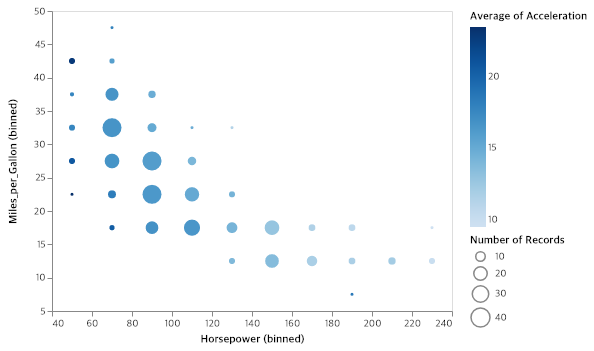

In [28]:
alt.Chart(cars).mark_circle().encode(
    alt.X('Horsepower', bin=True),
    alt.Y('Miles_per_Gallon', bin=True),
    size='count()',
    color='average(Acceleration):Q'
)

### Encoding shorthand

|Shorthand	|Equivalent long-form|
|-----------|--------------------|
|x='name'	|alt.X('name')|
|x='name:Q'	|alt.X('name', type='quantitative')|
|x='sum(name)'	|alt.X('name', aggregate='sum')|
|x='sum(name):Q'	|alt.X('name', aggregate='sum', type='quantitative')|
|x='count():Q'	|alt.X(aggregate='count', type='quantitative')|

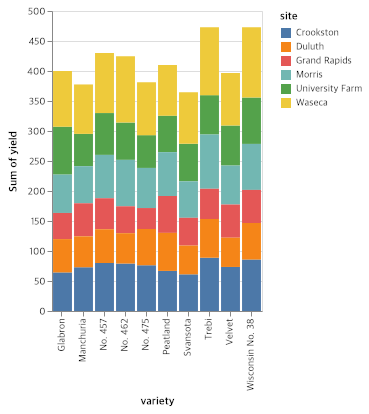

In [29]:
# controls the order of components of the stack

import altair as alt
from vega_datasets import data

barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    x='variety:N',
    y='sum(yield):Q',
    color='site:N',
    order=alt.Order("site", sort="ascending")
)

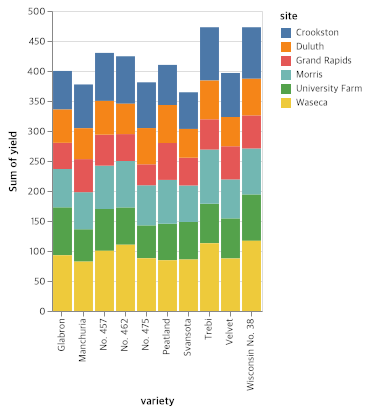

In [30]:
import altair as alt
from vega_datasets import data

barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    x='variety:N',
    y='sum(yield):Q',
    color='site:N',
    order=alt.Order("site", sort="descending")
)

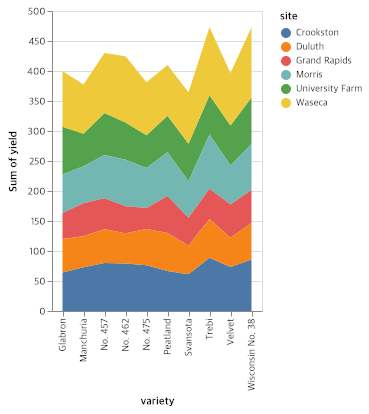

In [31]:
import altair as alt
from vega_datasets import data

barley = data.barley()

alt.Chart(barley).mark_area().encode(
    x='variety:N',
    y='sum(yield):Q',
    color='site:N',
    order=alt.Order("site", sort="ascending")
)

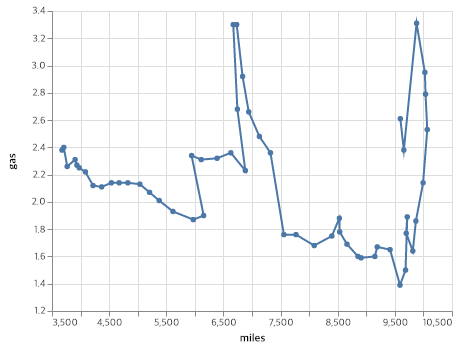

In [33]:
# For line marks, the order channel encodes the order in which data points are connected

import altair as alt
from vega_datasets import data

driving = data.driving()

alt.Chart(driving).mark_line(point=True).encode(
    alt.X('miles', scale=alt.Scale(zero=False)),
    alt.Y('gas', scale=alt.Scale(zero=False)),
    order='year'
)

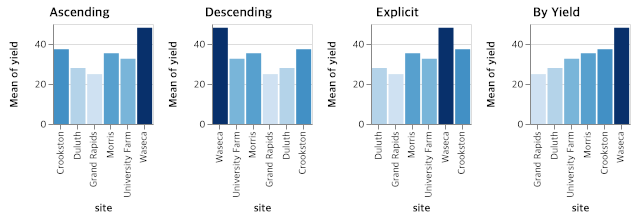

In [37]:
# Sorting Axes

import altair as alt
from vega_datasets import data

barley = data.barley()

base = alt.Chart(barley).mark_bar().encode(
    y='mean(yield):Q',
    color=alt.Color('mean(yield):Q', legend=None)
).properties(width=100, height=100)

# Sort x in ascending order
ascending = base.encode(
    alt.X(field='site', type='nominal', sort='ascending')
).properties(
    title='Ascending'
)

# Sort x in descending order
descending = base.encode(
    alt.X(field='site', type='nominal', sort='descending')
).properties(
    title='Descending'
)

# Sort x in an explicitly-specified order
explicit = base.encode(
    alt.X(field='site', type='nominal',
          sort=['Duluth', 'Grand Rapids', 'Morris',
                'University Farm', 'Waseca', 'Crookston'])
).properties(
    title='Explicit'
)

# Sort according to another field
sortfield = base.encode(
    alt.X(field='site', type='nominal',
          sort=alt.EncodingSortField(field='yield', op='mean'))
).properties(
    title='By Yield'
)

ascending | descending | explicit | sortfield

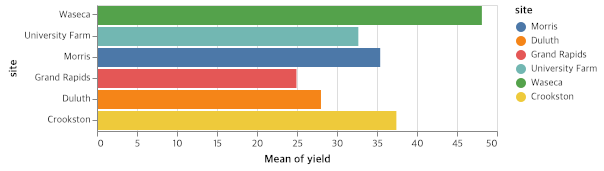

In [36]:
# Sorting legends

alt.Chart(barley).mark_rect().encode(
    alt.X('mean(yield):Q', sort='ascending'),
    alt.Y('site:N', sort='descending'),
    alt.Color('site:N',
        sort=['Morris', 'Duluth', 'Grand Rapids',
              'University Farm', 'Waseca', 'Crookston']
    )
)

# Marks
- argument 참조: https://altair-viz.github.io/user_guide/marks.html

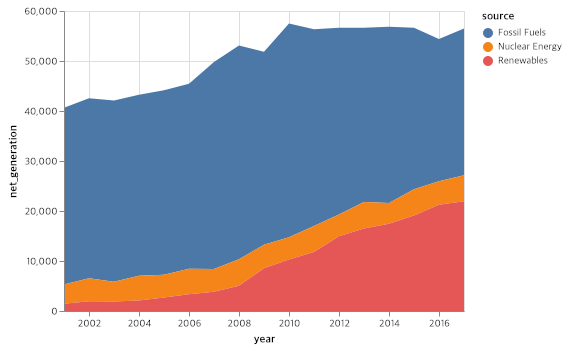

In [1]:
# area

import altair as alt
from vega_datasets import data

source = data.iowa_electricity()

alt.Chart(source).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N"
)

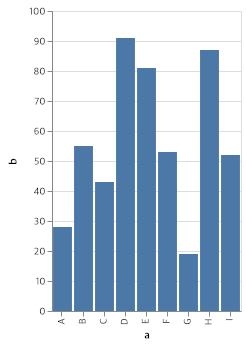

In [2]:
# bar

import altair as alt
import pandas as pd

source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

alt.Chart(source).mark_bar().encode(
    x='a',
    y='b'
)

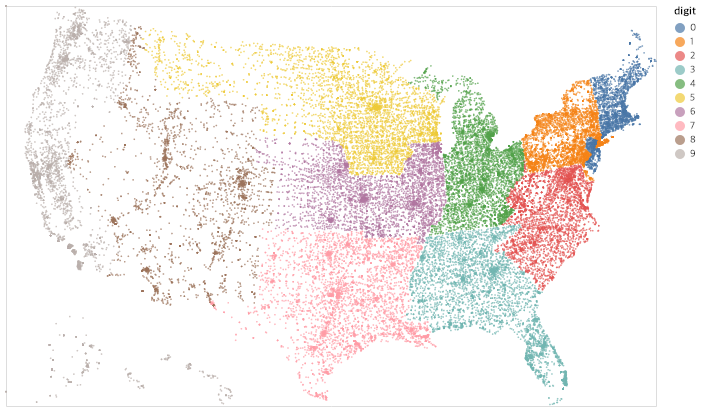

In [3]:
# circle

import altair as alt
from vega_datasets import data

# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

alt.Chart(source).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='digit:N'
).project(
    type='albersUsa'
).properties(
    width=650,
    height=400
).transform_calculate(
    "digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
)

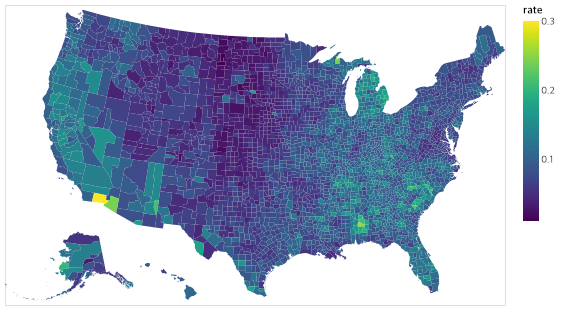

In [4]:
# geoshape

import altair as alt
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

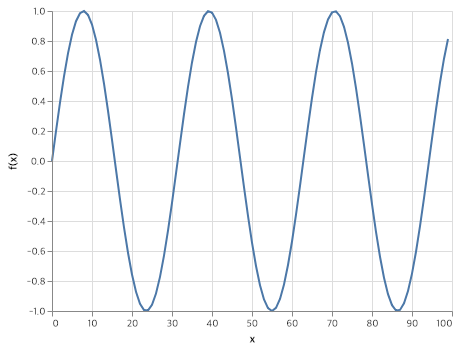

In [5]:
# line

import altair as alt
import numpy as np
import pandas as pd

x = np.arange(100)
source = pd.DataFrame({
  'x': x,
  'f(x)': np.sin(x / 5)}
)

alt.Chart(source).mark_line().encode(
    x='x',
    y='f(x)'
)

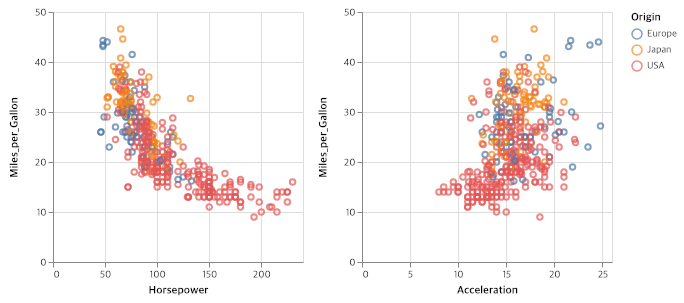

In [6]:
# point

import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(source).mark_point().encode(
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray'))
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

base.encode(x='Horsepower') | base.encode(x='Acceleration')

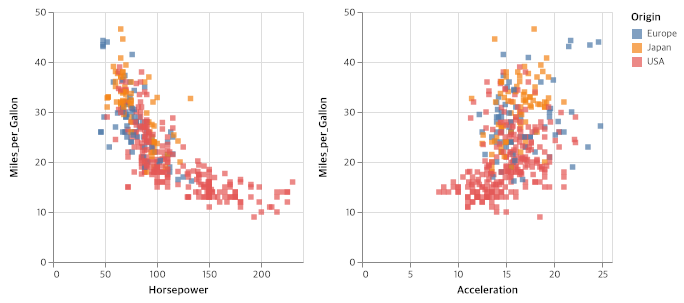

In [12]:
# square

import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(source).mark_square().encode(
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray'))
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

base.encode(x='Horsepower') | base.encode(x='Acceleration')

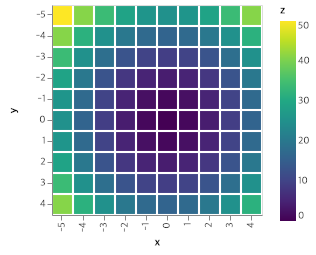

In [7]:
# rect

import altair as alt
import numpy as np
import pandas as pd

# Compute x^2 + y^2 across a 2D grid
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2

# Convert this grid to columnar data expected by Altair
source = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(source).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)

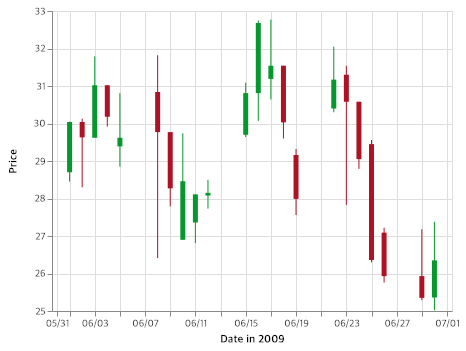

In [8]:
# rule

import altair as alt
import pandas as pd

source = pd.DataFrame(
[
      {
        "date": "2009-06-01",
        "open": 28.7,
        "high": 30.05,
        "low": 28.45,
        "close": 30.04,
        "signal": "short",
        "ret": -4.89396411092985
      },
      {
        "date": "2009-06-02",
        "open": 30.04,
        "high": 30.13,
        "low": 28.3,
        "close": 29.63,
        "signal": "short",
        "ret": -0.322580645161295
      },
      {
        "date": "2009-06-03",
        "open": 29.62,
        "high": 31.79,
        "low": 29.62,
        "close": 31.02,
        "signal": "short",
        "ret": 3.68663594470045
      },
      {
        "date": "2009-06-04",
        "open": 31.02,
        "high": 31.02,
        "low": 29.92,
        "close": 30.18,
        "signal": "short",
        "ret": 4.51010886469673
      },
      {
        "date": "2009-06-05",
        "open": 29.39,
        "high": 30.81,
        "low": 28.85,
        "close": 29.62,
        "signal": "short",
        "ret": 6.08424336973478
      },
      {
        "date": "2009-06-08",
        "open": 30.84,
        "high": 31.82,
        "low": 26.41,
        "close": 29.77,
        "signal": "short",
        "ret": 1.2539184952978
      },
      {
        "date": "2009-06-09",
        "open": 29.77,
        "high": 29.77,
        "low": 27.79,
        "close": 28.27,
        "signal": "short",
        "ret": -5.02431118314424
      },
      {
        "date": "2009-06-10",
        "open": 26.9,
        "high": 29.74,
        "low": 26.9,
        "close": 28.46,
        "signal": "short",
        "ret": -5.46623794212217
      },
      {
        "date": "2009-06-11",
        "open": 27.36,
        "high": 28.11,
        "low": 26.81,
        "close": 28.11,
        "signal": "short",
        "ret": -8.3743842364532
      },
      {
        "date": "2009-06-12",
        "open": 28.08,
        "high": 28.5,
        "low": 27.73,
        "close": 28.15,
        "signal": "short",
        "ret": -5.52763819095477
      },
      {
        "date": "2009-06-15",
        "open": 29.7,
        "high": 31.09,
        "low": 29.64,
        "close": 30.81,
        "signal": "long",
        "ret": 3.4920634920635
      },
      {
        "date": "2009-06-16",
        "open": 30.81,
        "high": 32.75,
        "low": 30.07,
        "close": 32.68,
        "signal": "short",
        "ret": 0.155038759689914
      },
      {
        "date": "2009-06-17",
        "open": 31.19,
        "high": 32.77,
        "low": 30.64,
        "close": 31.54,
        "signal": "short",
        "ret": 5.82822085889571
      },
      {
        "date": "2009-06-18",
        "open": 31.54,
        "high": 31.54,
        "low": 29.6,
        "close": 30.03,
        "signal": "short",
        "ret": 8.17610062893082
      },
      {
        "date": "2009-06-19",
        "open": 29.16,
        "high": 29.32,
        "low": 27.56,
        "close": 27.99,
        "signal": "short",
        "ret": 8.59872611464968
      },
      {
        "date": "2009-06-22",
        "open": 30.4,
        "high": 32.05,
        "low": 30.3,
        "close": 31.17,
        "signal": "short",
        "ret": 15.4907975460123
      },
      {
        "date": "2009-06-23",
        "open": 31.3,
        "high": 31.54,
        "low": 27.83,
        "close": 30.58,
        "signal": "short",
        "ret": 11.7370892018779
      },
      {
        "date": "2009-06-24",
        "open": 30.58,
        "high": 30.58,
        "low": 28.79,
        "close": 29.05,
        "signal": "long",
        "ret": -10.4234527687296
      },
      {
        "date": "2009-06-25",
        "open": 29.45,
        "high": 29.56,
        "low": 26.3,
        "close": 26.36,
        "signal": "long",
        "ret": 0
      },
      {
        "date": "2009-06-26",
        "open": 27.09,
        "high": 27.22,
        "low": 25.76,
        "close": 25.93,
        "signal": "long",
        "ret": 0
      },
      {
        "date": "2009-06-29",
        "open": 25.93,
        "high": 27.18,
        "low": 25.29,
        "close": 25.35,
        "signal": "long",
        "ret": 5.26315789473684
      },
      {
        "date": "2009-06-30",
        "open": 25.36,
        "high": 27.38,
        "low": 25.02,
        "close": 26.35,
        "signal": "long",
        "ret": 6.73758865248228
      }
    ]
)
open_close_color = alt.condition("datum.open < datum.close",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

rule = alt.Chart(source).mark_rule().encode(
    alt.X(
        'yearmonthdate(date):T',
        scale=alt.Scale(domain=[{"month": 5, "date": 31, "year": 2009},
                                {"month": 7, "date": 1, "year": 2009}]),
        axis=alt.Axis(format='%m/%d', title='Date in 2009')
    ),
    alt.Y(
        'low',
        scale=alt.Scale(zero=False),
        axis=alt.Axis(title='Price')
    ),
    alt.Y2('high'),
    color=open_close_color
)

bar = alt.Chart(source).mark_bar().encode(
    x='yearmonthdate(date):T',
    y='open',
    y2='close',
    color=open_close_color
)

rule + bar

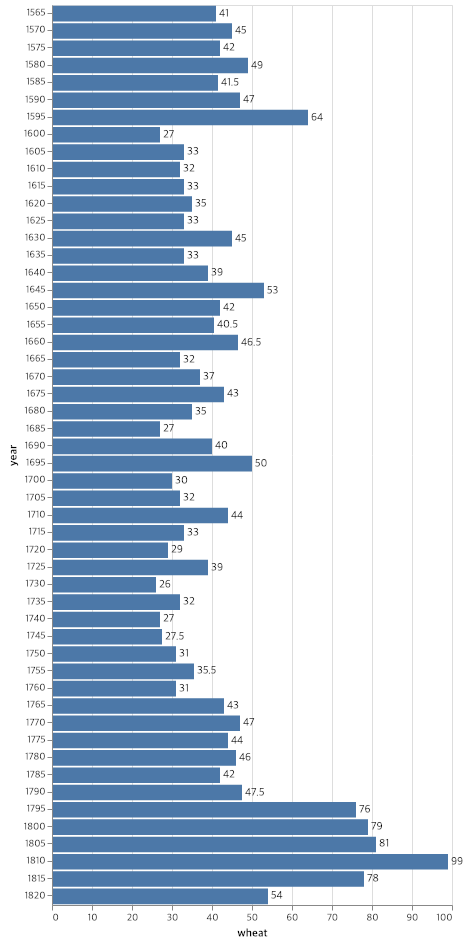

In [10]:
# text

import altair as alt
from vega_datasets import data

source = data.wheat()

bars = alt.Chart(source).mark_bar().encode(
    x='wheat:Q',
    y="year:O"
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='wheat:Q'
)

(bars + text).properties(height=900)

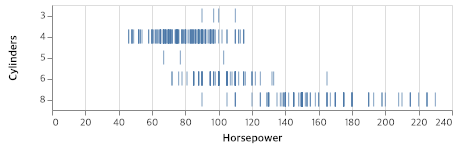

In [11]:
# tick

import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_tick().encode(
    x='Horsepower:Q',
    y='Cylinders:O'
)

# Data Transformations